# Sweet n Sour Sentiment on the Street
Georgia Tech Data Science Bootcamp - Cohort 6
Final Project
Team Members:
* Joseph Ayala
* Andrew Behrman
* Michael Fox
* Michael Hankinson

### Regression Analysis

#### This notebook is designed to run a multi-variate regression analysis on the various ticker features and determine which is most influential

In [2]:
import pandas as pd


In [3]:
df = pd.read_csv('../db/final_complete_merged_dataset.csv', sep='|')
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'call_datetime', 'Unnamed: 0_x', 'id',
       'sentiment', 'sentence', 'ticker', 'call_title', 'speaker',
       'call_section', 'vader_sentiment', 'call_date', 'call_time',
       'unique_id', 'base_date', 'next_date', 'base_close', 'base_volume',
       'next_close', 'next_volume', 'Unnamed: 0_y', 'marketCap',
       'percent_change_price', 'percent_change_volume', 'model_results',
       'kmeans_cluster'],
      dtype='object')

In [4]:
df['binary_price_change'] = df['percent_change_price'].apply(lambda x: 1 if (x > 0) else 0)
df['sentiment'] = df['model_results']
df = df[df['sentiment']!=3]
df.head()

,Unnamed: 0,Unnamed: 0.1,call_datetime,Unnamed: 0_x,id,sentiment,sentence,ticker,call_title,speaker,...,base_volume,next_close,next_volume,Unnamed: 0_y,marketCap,percent_change_price,percent_change_volume,model_results,kmeans_cluster,binary_price_change
3,3,3,2019-11-01 10:00:00,460,460,4,[Operator Instructions] I would now like to tu...,D,"Dominion Energy, Inc. (NYSE:D) Q3 2019 Earning...",Operator,...,2424000.0,83.269997,3169600.0,D,67584167936,0.872191,30.759076,4,1,1
7,7,7,2019-11-01 10:00:00,464,464,4,Earnings materials including our prepared rema...,D,"Dominion Energy, Inc. (NYSE:D) Q3 2019 Earning...",Steven Ridge,...,2424000.0,83.269997,3169600.0,D,67584167936,0.872191,30.759076,4,0,1
9,9,9,2019-11-01 10:00:00,466,466,2,"This morning, we will discuss some measures of...",D,"Dominion Energy, Inc. (NYSE:D) Q3 2019 Earning...",Steven Ridge,...,2424000.0,83.269997,3169600.0,D,67584167936,0.872191,30.759076,2,4,1
10,10,10,2019-11-01 10:00:00,467,467,4,"Joining today's call are Tom Farrell, Chairman...",D,"Dominion Energy, Inc. (NYSE:D) Q3 2019 Earning...",Steven Ridge,...,2424000.0,83.269997,3169600.0,D,67584167936,0.872191,30.759076,4,4,1
12,12,12,2019-11-01 10:00:00,469,469,4,Thanks Steve and good morning.,D,"Dominion Energy, Inc. (NYSE:D) Q3 2019 Earning...",James Chapman,...,2424000.0,83.269997,3169600.0,D,67584167936,0.872191,30.759076,4,0,1


In [5]:
df.describe()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0_x,id,sentiment,vader_sentiment,base_close,base_volume,next_close,next_volume,marketCap,percent_change_price,percent_change_volume,model_results,kmeans_cluster,binary_price_change
count,7196.000000,7196.000000,7196.000000,7196.000000,7196.000000,7196.00000,7196.000000,7.196000e+03,7196.000000,7.196000e+03,7.196000e+03,7196.000000,7196.000000,7196.000000,7196.000000,7196.000000
mean,21404.248193,23461.823096,18324.719011,18324.719011,3.460256,0.25796,145.491668,6.136531e+06,141.855101,1.334200e+07,5.192571e+10,-0.195619,95.914808,3.460256,1.732073,0.550167
std,12397.046832,16007.809168,12519.542072,12519.542072,0.931395,0.34591,271.773393,1.131720e+07,252.201879,3.005532e+07,6.134260e+10,5.626936,121.127704,0.931395,1.575236,0.497512
min,3.000000,3.000000,1.000000,1.000000,1.000000,-0.94130,9.070000,2.280000e+05,10.110000,4.135000e+05,5.205218e+09,-20.808657,-30.405860,1.000000,0.000000,0.000000
25%,10704.250000,10704.250000,6407.000000,6407.000000,2.000000,0.00000,41.790001,1.473700e+06,42.950001,2.355400e+06,1.279713e+10,-3.140449,30.741410,2.000000,0.000000,0.000000
50%,21290.500000,21290.500000,17640.000000,17640.000000,4.000000,0.22630,82.730003,2.525500e+06,84.559998,4.400500e+06,2.471340e+10,0.439476,65.650464,4.000000,2.000000,1.000000
75%,32018.250000,32018.250000,28805.750000,28805.750000,4.000000,0.52670,141.910004,6.134200e+06,139.580002,1.070740e+07,6.095349e+10,3.042750,124.076569,4.000000,3.000000,1.000000
max,42940.000000,64976.000000,40710.000000,40710.000000,5.000000,0.98350,2012.089966,7.865600e+07,1849.930054,2.159434e+08,2.962090e+11,13.692753,771.327086,5.000000,4.000000,1.000000


In [6]:
grouped_df = df.groupby(by=['ticker','call_section']).agg({
    'sentiment' : "mean",
    'vader_sentiment': "mean",
    'kmeans_cluster': "mean",  ### FUTURE: Need to figure out how to get better kmeans cluster for group of sentences
    'marketCap': "mean",
    'base_volume': "mean",
    'percent_change_price': "mean",
    'binary_price_change': "mean"
})
#grouped_df = pd.DataFrame((group['sentiment','vader_sentiment','marketCap','base_volume','percent_change_price',
#                                 'binary_price_change']).mean())

grouped_df.head()


sentiment  vader_sentiment  kmeans_cluster  \
ticker call_section                                                       
AAP    answer                 3.513158         0.228612        1.776316   
       operator_instruction   4.000000         0.000000        1.333333   
       presentation           3.677419         0.390390        1.451613   
       question               3.428571         0.079811        2.178571   
ABBV   answer                 3.425926         0.264563        1.592593   

                                marketCap  base_volume  percent_change_price  \
ticker call_section                                                            
AAP    answer                 11265734656    1805500.0             -7.510963   
       operator_instruction   11265734656    1805500.0             -7.510963   
       presentation           11265734656    1805500.0             -7.510963   
       question               11265734656    1805500.0             -7.510963   
ABBV   answer                131067805696   10009400.0              2.765552   

                             binary_price_change  
ticker call_section                               
AAP    answer                                  0  
       operator_instruction                    0  
       presentation                            0  
       question                                0  
ABBV   answer                                  1

In [7]:
grouped_df = grouped_df.reset_index()
grouped_df.head()

,ticker,call_section,sentiment,vader_sentiment,kmeans_cluster,marketCap,base_volume,percent_change_price,binary_price_change
0,AAP,answer,3.513158,0.228612,1.776316,11265734656,1805500.0,-7.510963,0
1,AAP,operator_instruction,4.000000,0.000000,1.333333,11265734656,1805500.0,-7.510963,0
2,AAP,presentation,3.677419,0.390390,1.451613,11265734656,1805500.0,-7.510963,0
3,AAP,question,3.428571,0.079811,2.178571,11265734656,1805500.0,-7.510963,0
4,ABBV,answer,3.425926,0.264563,1.592593,131067805696,10009400.0,2.765552,1


In [8]:
grouped_df.drop(columns='ticker',inplace=True)
grouped_df['call_section_codes'] = grouped_df['call_section'].astype('category').cat.codes
grouped_df.head()

,call_section,sentiment,vader_sentiment,kmeans_cluster,marketCap,base_volume,percent_change_price,binary_price_change,call_section_codes
0,answer,3.513158,0.228612,1.776316,11265734656,1805500.0,-7.510963,0,0
1,operator_instruction,4.000000,0.000000,1.333333,11265734656,1805500.0,-7.510963,0,1
2,presentation,3.677419,0.390390,1.451613,11265734656,1805500.0,-7.510963,0,2
3,question,3.428571,0.079811,2.178571,11265734656,1805500.0,-7.510963,0,3
4,answer,3.425926,0.264563,1.592593,131067805696,10009400.0,2.765552,1,0


In [9]:
grouped_df = pd.get_dummies(grouped_df, columns=['call_section'])
grouped_df.head()

,sentiment,vader_sentiment,kmeans_cluster,marketCap,base_volume,percent_change_price,binary_price_change,call_section_codes,call_section_answer,call_section_operator_instruction,call_section_presentation,call_section_question
0,3.513158,0.228612,1.776316,11265734656,1805500.0,-7.510963,0,0,1,0,0,0
1,4.000000,0.000000,1.333333,11265734656,1805500.0,-7.510963,0,1,0,1,0,0
2,3.677419,0.390390,1.451613,11265734656,1805500.0,-7.510963,0,2,0,0,1,0
3,3.428571,0.079811,2.178571,11265734656,1805500.0,-7.510963,0,3,0,0,0,1
4,3.425926,0.264563,1.592593,131067805696,10009400.0,2.765552,1,0,1,0,0,0


In [10]:
grouped_df['vader_operator'] = grouped_df['call_section_operator_instruction'] * grouped_df['vader_sentiment']
grouped_df['vader_presentation'] = grouped_df['call_section_presentation'] * grouped_df['vader_sentiment']
grouped_df['vader_question'] = grouped_df['call_section_question'] * grouped_df['vader_sentiment']
grouped_df['vader_answer'] = grouped_df['call_section_answer'] * grouped_df['vader_sentiment']

grouped_df['sentiment_operator'] = grouped_df['call_section_operator_instruction'] * grouped_df['sentiment']
grouped_df['sentiment_presentation'] = grouped_df['call_section_presentation'] * grouped_df['sentiment']
grouped_df['sentiment_question'] = grouped_df['call_section_question'] * grouped_df['sentiment']
grouped_df['sentiment_answer'] = grouped_df['call_section_answer'] * grouped_df['sentiment']

grouped_df['kmeans_operator'] = grouped_df['call_section_operator_instruction'] * grouped_df['kmeans_cluster']
grouped_df['kmeans_presentation'] = grouped_df['call_section_presentation'] * grouped_df['kmeans_cluster']
grouped_df['kmeans_question'] = grouped_df['call_section_question'] * grouped_df['kmeans_cluster']
grouped_df['kmeans_answer'] = grouped_df['call_section_answer'] * grouped_df['kmeans_cluster']

grouped_df.head()

,sentiment,vader_sentiment,kmeans_cluster,marketCap,base_volume,percent_change_price,binary_price_change,call_section_codes,call_section_answer,call_section_operator_instruction,...,vader_question,vader_answer,sentiment_operator,sentiment_presentation,sentiment_question,sentiment_answer,kmeans_operator,kmeans_presentation,kmeans_question,kmeans_answer
0,3.513158,0.228612,1.776316,11265734656,1805500.0,-7.510963,0,0,1,0,...,0.000000,0.228612,0.0,0.000000,0.000000,3.513158,0.000000,0.000000,0.000000,1.776316
1,4.000000,0.000000,1.333333,11265734656,1805500.0,-7.510963,0,1,0,1,...,0.000000,0.000000,4.0,0.000000,0.000000,0.000000,1.333333,0.000000,0.000000,0.000000
2,3.677419,0.390390,1.451613,11265734656,1805500.0,-7.510963,0,2,0,0,...,0.000000,0.000000,0.0,3.677419,0.000000,0.000000,0.000000,1.451613,0.000000,0.000000
3,3.428571,0.079811,2.178571,11265734656,1805500.0,-7.510963,0,3,0,0,...,0.079811,0.000000,0.0,0.000000,3.428571,0.000000,0.000000,0.000000,2.178571,0.000000
4,3.425926,0.264563,1.592593,131067805696,10009400.0,2.765552,1,0,1,0,...,0.000000,0.264563,0.0,0.000000,0.000000,3.425926,0.000000,0.000000,0.000000,1.592593


In [11]:
grouped_df.describe()

,sentiment,vader_sentiment,kmeans_cluster,marketCap,base_volume,percent_change_price,binary_price_change,call_section_codes,call_section_answer,call_section_operator_instruction,...,vader_question,vader_answer,sentiment_operator,sentiment_presentation,sentiment_question,sentiment_answer,kmeans_operator,kmeans_presentation,kmeans_question,kmeans_answer
count,321.000000,321.000000,321.000000,3.210000e+02,3.210000e+02,321.000000,321.000000,321.000000,321.000000,321.000000,...,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000
mean,3.421760,0.220747,1.779527,4.880268e+10,5.692122e+06,-0.204395,0.548287,1.507788,0.252336,0.239875,...,0.055833,0.062022,0.794346,0.877484,0.865731,0.884199,0.448657,0.448852,0.458791,0.423226
std,0.358088,0.129319,0.620986,5.952945e+10,1.030642e+07,5.708304,0.498440,1.123931,0.435031,0.427674,...,0.108292,0.113875,1.447560,1.503989,1.497673,1.526890,0.967738,0.781175,0.820114,0.740303
min,1.500000,-0.098667,0.000000,5.205218e+09,2.280000e+05,-20.808657,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.263158,0.141033,1.500000,1.233534e+10,1.480900e+06,-2.840792,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.447368,0.227178,1.736842,2.355240e+10,2.525500e+06,0.439476,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.600000,0.305330,2.000000,5.599563e+10,6.038700e+06,3.042750,1.000000,3.000000,1.000000,0.000000,...,0.014650,0.080867,0.000000,2.941176,2.750000,3.000000,0.000000,1.146341,0.625000,1.083333
max,5.000000,0.709600,4.000000,2.962090e+11,7.865600e+07,13.692753,1.000000,3.000000,1.000000,1.000000,...,0.418592,0.402298,5.000000,4.000000,4.000000,4.000000,4.000000,2.642857,2.785714,2.285714


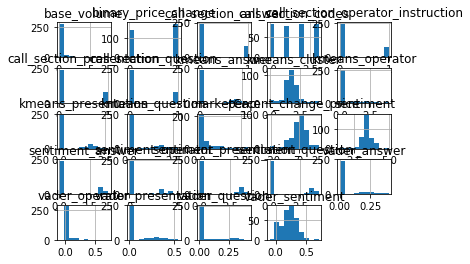

In [13]:
import pylab as pl
grouped_df.hist()
pl.show()

In [14]:
grouped_df.head()

,sentiment,vader_sentiment,kmeans_cluster,marketCap,base_volume,percent_change_price,binary_price_change,call_section_codes,call_section_answer,call_section_operator_instruction,...,vader_question,vader_answer,sentiment_operator,sentiment_presentation,sentiment_question,sentiment_answer,kmeans_operator,kmeans_presentation,kmeans_question,kmeans_answer
0,3.513158,0.228612,1.776316,11265734656,1805500.0,-7.510963,0,0,1,0,...,0.000000,0.228612,0.0,0.000000,0.000000,3.513158,0.000000,0.000000,0.000000,1.776316
1,4.000000,0.000000,1.333333,11265734656,1805500.0,-7.510963,0,1,0,1,...,0.000000,0.000000,4.0,0.000000,0.000000,0.000000,1.333333,0.000000,0.000000,0.000000
2,3.677419,0.390390,1.451613,11265734656,1805500.0,-7.510963,0,2,0,0,...,0.000000,0.000000,0.0,3.677419,0.000000,0.000000,0.000000,1.451613,0.000000,0.000000
3,3.428571,0.079811,2.178571,11265734656,1805500.0,-7.510963,0,3,0,0,...,0.079811,0.000000,0.0,0.000000,3.428571,0.000000,0.000000,0.000000,2.178571,0.000000
4,3.425926,0.264563,1.592593,131067805696,10009400.0,2.765552,1,0,1,0,...,0.000000,0.264563,0.0,0.000000,0.000000,3.425926,0.000000,0.000000,0.000000,1.592593


In [15]:
from pandas import DataFrame
from sklearn import linear_model
# train test split
from sklearn.model_selection import train_test_split

X_all = grouped_df.drop(columns=['vader_sentiment','kmeans_cluster','sentiment','percent_change_price','binary_price_change',
                            'call_section_answer','call_section_operator_instruction','call_section_presentation',
                            'vader_sentiment',
                        #   'vader_question', 'vader_answer','vader_operator','vader_presentation',
                        #   'sentiment_question', 'sentiment_answer','sentiment_operator','sentiment_presentation',
                        #    'kmeans_question', 'kmeans_answer','kmeans_operator','kmeans_presentation',
                        #     'base_volume','marketCap',
                             'call_section_codes',
                            'call_section_question']) # here we have variables for multiple regression. 
X_vader = grouped_df.drop(columns=['vader_sentiment','kmeans_cluster','sentiment','percent_change_price','binary_price_change',
                            'call_section_answer','call_section_operator_instruction','call_section_presentation',
                            'vader_sentiment',
                         #  'vader_question', 'vader_answer','vader_operator','vader_presentation',
                           'sentiment_question', 'sentiment_answer','sentiment_operator','sentiment_presentation',
                            'kmeans_question', 'kmeans_answer','kmeans_operator','kmeans_presentation',
                             'base_volume','marketCap',
                             'call_section_codes',
                            'call_section_question']) # here we have variables for multiple regression. 
X_sweet = grouped_df.drop(columns=['vader_sentiment','kmeans_cluster','sentiment','percent_change_price','binary_price_change',
                            'call_section_answer','call_section_operator_instruction','call_section_presentation',
                            'vader_sentiment',
                           'vader_question', 'vader_answer','vader_operator','vader_presentation',
                        #   'sentiment_question', 'sentiment_answer','sentiment_operator','sentiment_presentation',
                            'kmeans_question', 'kmeans_answer','kmeans_operator','kmeans_presentation',
                             'base_volume','marketCap',
                             'call_section_codes',
                            'call_section_question']) # here we have variables for multiple regression. 
X_kmeans = grouped_df.drop(columns=['vader_sentiment','kmeans_cluster','sentiment','percent_change_price','binary_price_change',
                            'call_section_answer','call_section_operator_instruction','call_section_presentation',
                            'vader_sentiment',
                           'vader_question', 'vader_answer','vader_operator','vader_presentation',
                           'sentiment_question', 'sentiment_answer','sentiment_operator','sentiment_presentation',
                        #    'kmeans_question', 'kmeans_answer','kmeans_operator','kmeans_presentation',
                             'base_volume','marketCap',
                             'call_section_codes',
                            'call_section_question']) # here we have variables for multiple regression. 
X_mkt = grouped_df.drop(columns=['vader_sentiment','kmeans_cluster','sentiment','percent_change_price','binary_price_change',
                            'call_section_answer','call_section_operator_instruction','call_section_presentation',
                            'vader_sentiment',
                           'vader_question', 'vader_answer','vader_operator','vader_presentation',
                           'sentiment_question', 'sentiment_answer','sentiment_operator','sentiment_presentation',
                            'kmeans_question', 'kmeans_answer','kmeans_operator','kmeans_presentation',
                        #     'base_volume','marketCap',
                             'call_section_codes',
                            'call_section_question']) # here we have variables for multiple regression. 
X = [X_all, X_vader, X_sweet, X_kmeans, X_mkt]
#Y = grouped_df['percent_change_price']
Y = grouped_df['binary_price_change']

for x_group in X:
    
    X_train, X_test, y_train, y_test = train_test_split(x_group, Y, random_state=1)

    # with sklearn
    #regr = linear_model.LinearRegression()
    regr = linear_model.LogisticRegression()
    regr.fit(X_train, y_train)

    print('*****')
    print('sklearn results:')
    print('Intercept: \n', regr.intercept_)
    print('Coefficients: \n', regr.coef_)
    print('*****')
    print(f'Logistic Regression Accuracy: {regr.score(X_test,y_test)}')


*****
sklearn results:
Intercept: 
 [-7.73750021e-16]
Coefficients: 
 [[ 3.69722434e-13  2.88562500e-08  8.00366146e-17 -4.37522096e-17
   1.03550290e-17 -1.48825634e-16 -5.84992154e-15  1.13037978e-15
  -2.66179720e-16  1.54438263e-15 -2.25468844e-15 -2.54900476e-16
  -9.11008771e-16  1.16893790e-15]]
*****
Logistic Regression Accuracy: 0.6049382716049383
*****
sklearn results:
Intercept: 
 [0.10440655]
Coefficients: 
 [[ 0.11346236  0.02657385  0.15459173 -0.04982986]]
*****
Logistic Regression Accuracy: 0.6049382716049383
*****
sklearn results:
Intercept: 
 [0.31153974]
Coefficients: 
 [[-0.12559082 -0.03768593 -0.04666948 -0.03054348]]
*****
Logistic Regression Accuracy: 0.5432098765432098
*****
sklearn results:
Intercept: 
 [0.11909512]
Coefficients: 
 [[-0.06657289  0.00380576 -0.01070067  0.06751112]]
*****
Logistic Regression Accuracy: 0.5185185185185185
*****
sklearn results:
Intercept: 
 [-7.73750021e-16]
Coefficients: 
 [[3.69722434e-13 2.88562500e-08]]
*****
Logistic Regres

/Users/i817245/anaconda3/envs/gtfinalproj/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/i817245/anaconda3/envs/gtfinalproj/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/i817245/anaconda3/envs/gtfinalproj/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/i817245/anaconda3/envs/gtfinalproj/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/i817245/anaconda3/envs/gtfinalproj/lib/python3.6/site-package

In [17]:
import statsmodels.api as sm

for x_group in X:
    X_train, X_test, y_train, y_test = train_test_split(x_group, Y, random_state=1)
    logit_model=sm.Logit(y_train, X_train)
    result=logit_model.fit()
    print('*****')

    print(result.summary2())


Optimization terminated successfully.
         Current function value: 0.664945
         Iterations 6
*****
                            Results: Logit
Model:                Logit                Pseudo R-squared:  0.038   
Dependent Variable:   binary_price_change  AIC:               347.1738
Date:                 2019-11-19 18:25     BIC:               395.9027
No. Observations:     240                  Log-Likelihood:    -159.59 
Df Model:             13                   LL-Null:           -165.95 
Df Residuals:         226                  LLR p-value:       0.46969 
Converged:            1.0000               Scale:             1.0000  
No. Iterations:       6.0000                                          
----------------------------------------------------------------------
                        Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
----------------------------------------------------------------------
marketCap               0.0000   0.0000  0.4840 0.6284  -0.0000 0.00

In [18]:
for x_group in X:
    X_train, X_test, y_train, y_test = train_test_split(x_group, Y, random_state=1)

    # try random forest
    from sklearn.ensemble import RandomForestClassifier

    # Instantiate model with 500 decision trees
    rf = RandomForestClassifier(n_estimators = 200, random_state = 1)

    # Train the model on training data
    rf.fit(X_train, y_train)
    
    print('*****')
    print('Random Forest Accuracy of Predicting Positive/Negative price Change: ')
    print(rf.score(X_test, y_test))
    
    feature_importances = zip(X_test.columns, rf.feature_importances_)
    sorted_features = sorted(feature_importances, key=lambda x: x[1],reverse=True)
    print('*****')
    print(sorted_features)

*****
Random Forest Accuracy of Predicting Positive/Negative price Change: 
0.7654320987654321
*****
[('base_volume', 0.24492677666427576), ('marketCap', 0.2289846044855418), ('vader_answer', 0.05626981285447723), ('kmeans_question', 0.05095993097160442), ('sentiment_presentation', 0.04808622405050026), ('vader_presentation', 0.04694556556489639), ('kmeans_answer', 0.04607304896431934), ('sentiment_answer', 0.0433123331032486), ('vader_question', 0.043272101133146335), ('kmeans_presentation', 0.0430378059514545), ('sentiment_question', 0.04073013736117326), ('vader_operator', 0.039284445437284654), ('kmeans_operator', 0.03908185446353852), ('sentiment_operator', 0.029035358994538938)]
*****
Random Forest Accuracy of Predicting Positive/Negative price Change: 
0.48148148148148145
*****
[('vader_question', 0.2915430101846064), ('vader_presentation', 0.28651331562517907), ('vader_answer', 0.26694798149377624), ('vader_operator', 0.1549956926964384)]
*****
Random Forest Accuracy of Predict